In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from utils.data import load_tc_data
from utils.plot import make_cmap
import cftime as cf
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset
from numpy import inf
from scipy.stats import gaussian_kde
import matplotlib.colors as mcolors
from scipy import stats
import matplotlib.pyplot as plt
import tropycal
from tropycal import tracks


In [103]:

inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/valid_X.npy')
training_inputs = np.load('/user/work/al18709/tc_data_flipped/KE_tracks/train_X.npy')


In [110]:
# for model in ['canesm','cnrm6','ecearth6','ipsl6','miroc6','mpi6','mri6','ukmo'][0]:
for model in ['CMCC-CM2-VHR4','EC-Earth3P-HR','HadGEM3-GC31-HM','MPI-ESM1-2-HR']:
	for scenario in ['historical','ssp585']:
		# globals()[f'{model}_topography_{scenario}'] = np.load(f'/user/home/al18709/work/ke_track_inputs/{model}_{scenario}_topography.npy')
		print(model,scenario)
		if scenario == 'historical':
			scen = 'hist-1950'
			yr1 = 1950
			start_year = 2000
			yr2 = 2014
		elif scenario == 'ssp585':
			scen = 'highres-future'
			start_year = 2035
			yr1 = 2015
			yr2 = 2050
		if model == 'CMCC-CM2-VHR4':
			model_name = 'cmcc'
			run = 'r1i1p1f1'
			g = 'gn'
		elif model == 'EC-Earth3P-HR':
			model_name = 'ecearth'
			run = 'r1i1p2f1'
			g = 'gr'
		elif model == 'HadGEM3-GC31-HM':
			model_name = 'hadgem'
			run = 'r1i1p1f1'
			g = 'gn'
		elif model == 'MPI-ESM1-2-HR':
			model_name = 'mpi'
			run = 'r1i1p1f1'
			g = 'gn'

		nh = xr.open_dataset(f'/user/home/al18709/work/CMIP6/HighResMIP/{model}/tracks/{scenario}/NH/TC-NH_TRACK_{model}_{scen}_{run}_{g}_{yr1}0101-{yr2}1231.nc',use_cftime=True)
		sh = xr.open_dataset(f'/user/home/al18709/work/CMIP6/HighResMIP/{model}/tracks/{scenario}/SH/TC-SH_TRACK_{model}_{scen}_{run}_{g}_{yr1}0101-{yr2}1231.nc',use_cftime=True)

		storm_start = nh.FIRST_PT
		storm_duration = nh.NUM_PTS #first point?
		lats = nh.lat_sfcWind
		lons = nh.lon_sfcWind
		time = nh.time
		track_id = nh.TRACK_ID #num points?
		w_speed = nh.sfcWind
		sids = []
		for i,track in enumerate(track_id.values):
			list = [track] * int(storm_duration[i].values)
			for l in list:
				sids.append(l)
		
		sids_unique=track_id

		df = pd.DataFrame({'lat':lats,'lon':lons,'sid':sids,'year':time.dt.year,'wind_speed':w_speed})
		tracks_grouped = df.groupby('sid')
		nature = []
		for i,s in enumerate(track_id.values):
			storm = tracks_grouped.get_group(s)
			if np.all(storm.wind_speed < 33.):
				list = ['TD'] * int(storm_duration[i].values)
				for l in list:
					nature.append(l)
			else:
				list = ['TS'] * int(storm_duration[i].values)
				for l in list:
					nature.append(l)
		
		df['nature'] = nature
		df_filtered = df[df['nature'] == 'TS']
		df_filtered = df_filtered[df_filtered['year'] >= start_year]
		df_filtered = df_filtered[df_filtered['year'] <= yr2]
		group_nh = df_filtered.groupby('sid')
		globals()[f'{model_name}_tracks_{scenario}_nh'] = df_filtered
		print(model_name,scenario,'number of storms nh',group_nh.ngroups)

		storm_start = sh.FIRST_PT
		storm_duration = sh.NUM_PTS #first point?
		lats = sh.lat_sfcWind
		lons = sh.lon_sfcWind
		time = sh.time
		track_id = sh.TRACK_ID #num points?
		w_speed = sh.sfcWind
		sids = []
		for i,track in enumerate(track_id.values):
			# print(track)
			list = [track] * int(storm_duration[i].values)
			for l in list:
				sids.append(l)
		df = pd.DataFrame({'lat':lats,'lon':lons,'sid':sids,'year':time.dt.year,'wind_speed':w_speed})
		tracks_grouped = df.groupby('sid')
		nature = []
		for i,s in enumerate(track_id.values):
			storm = tracks_grouped.get_group(s)
			if np.all(storm.wind_speed < 33.):
				list = ['TD'] * int(storm_duration[i].values)
				for l in list:
					nature.append(l)
			else:
				list = ['TS'] * int(storm_duration[i].values)
				for l in list:
					nature.append(l)
		
		df['nature'] = nature
		df_filtered = df[df['nature'] == 'TS']
		df_filtered = df_filtered[df_filtered['year'] >= start_year]
		df_filtered = df_filtered[df_filtered['year'] <= yr2]
		group_sh = df_filtered.groupby('sid')
		print(model_name,scenario,'number of storms sh',group_sh.ngroups)
		globals()[f'{model_name}_tracks_{scenario}_sh'] = df_filtered
		



CMCC-CM2-VHR4 historical


cmcc historical number of storms nh 216
cmcc historical number of storms sh 157
CMCC-CM2-VHR4 ssp585
cmcc ssp585 number of storms nh 258
cmcc ssp585 number of storms sh 175
EC-Earth3P-HR historical
ecearth historical number of storms nh 20
ecearth historical number of storms sh 10
EC-Earth3P-HR ssp585
ecearth ssp585 number of storms nh 31
ecearth ssp585 number of storms sh 5
HadGEM3-GC31-HM historical
hadgem historical number of storms nh 86
hadgem historical number of storms sh 24
HadGEM3-GC31-HM ssp585
hadgem ssp585 number of storms nh 100
hadgem ssp585 number of storms sh 41
MPI-ESM1-2-HR historical
mpi historical number of storms nh 4
mpi historical number of storms sh 1
MPI-ESM1-2-HR ssp585
mpi ssp585 number of storms nh 2
mpi ssp585 number of storms sh 0


In [105]:
# cmcc_tracks_historical_nh
cmcc_tracks_historical_sh

,lat,lon,sid,year,wind_speed,nature
627,-13.259450,138.7500,10,1950,15.773670,TS
628,-11.851370,138.4375,10,1950,16.268700,TS
629,-12.320730,140.0000,10,1950,16.300480,TS
630,-13.963490,139.6875,10,1950,17.833851,TS
631,-14.432860,140.3125,10,1950,17.014441,TS
...,...,...,...,...,...,...
269196,-64.654503,2.8125,4871,2014,16.357401,TS
269197,-63.715771,7.5000,4871,2014,16.182171,TS
269198,-69.582787,33.4375,4871,2014,17.195520,TS
269199,-69.582787,33.4375,4871,2014,20.856581,TS


In [106]:
binsize = 1
def to_bin(x): return np.floor(x / binsize) * binsize
def calc_track_density(storm_data,lonshift=False,mask=True):
    binsize = 1
    latbin = storm_data.lat.map(to_bin)
    lonbin = storm_data.lon.map(to_bin)
    new_df = pd.DataFrame({'latbin': latbin, 'lonbin': lonbin, 'stormid':storm_data.sid})
    new_new_df = new_df.drop_duplicates()
    if lonshift == True:
        lat_bins = np.arange(-90, 91, 1)
        lon_bins = np.arange(-180, 181, 1)
    else:
        lat_bins = np.arange(-90, 91, 1)
        lon_bins = np.arange(0, 361, 1)
    density, _, _ = np.histogram2d(new_new_df.latbin, new_new_df.lonbin, bins=[lat_bins, lon_bins])
    masked_density = np.ma.masked_equal(density, 0)
    if mask == True:
        return masked_density
    else:
        return density
def mask(data):
    return np.ma.masked_equal(data, 0)


In [107]:
# Compute histogram of cyclone tracks
['CMCC-CM2-VHR4','EC-Earth3P-HR','HadGEM3-GC31-HM','MPI-ESM1-2-HR']
cmcc_hist_masked_density_nh = calc_track_density(cmcc_tracks_historical_nh[(cmcc_tracks_historical_nh.year >= 2000) & (cmcc_tracks_historical_nh.year <= 2014)],mask=False)
cmcc_hist_masked_density_sh = calc_track_density(cmcc_tracks_historical_sh[(cmcc_tracks_historical_sh.year >= 2000) & (cmcc_tracks_historical_sh.year <= 2014)],mask=False)

ecearth_hist_masked_density_nh = calc_track_density(ecearth_tracks_historical_nh[(ecearth_tracks_historical_nh.year >= 2000) & (ecearth_tracks_historical_nh.year <= 2014)],mask=False)
ecearth_hist_masked_density_sh = calc_track_density(ecearth_tracks_historical_sh[(ecearth_tracks_historical_sh.year >= 2000) & (ecearth_tracks_historical_sh.year <= 2014)],mask=False)

hadgem_hist_masked_density_nh = calc_track_density(hadgem_tracks_historical_nh[(hadgem_tracks_historical_nh.year >= 2000) & (hadgem_tracks_historical_nh.year <= 2014)],mask=False)
hadgem_hist_masked_density_sh = calc_track_density(hadgem_tracks_historical_sh[(hadgem_tracks_historical_sh.year >= 2000) & (hadgem_tracks_historical_sh.year <= 2014)],mask=False)

mpi_hist_masked_density_nh = calc_track_density(mpi_tracks_historical_nh[(mpi_tracks_historical_nh.year >= 2000) & (mpi_tracks_historical_nh.year <= 2014)],mask=False)
mpi_hist_masked_density_sh = calc_track_density(mpi_tracks_historical_sh[(mpi_tracks_historical_sh.year >= 2000) & (mpi_tracks_historical_sh.year <= 2014)],mask=False)




In [108]:

['CMCC-CM2-VHR4','EC-Earth3P-HR','HadGEM3-GC31-HM','MPI-ESM1-2-HR']
cmcc_ssp585_masked_density_nh = calc_track_density(cmcc_tracks_ssp585_nh[(cmcc_tracks_ssp585_nh.year >= 2035) & (cmcc_tracks_ssp585_nh.year <= 2050)],mask=False)
cmcc_ssp585_masked_density_sh = calc_track_density(cmcc_tracks_ssp585_sh[(cmcc_tracks_ssp585_sh.year >= 2035) & (cmcc_tracks_ssp585_sh.year <= 2050)],mask=False)

ecearth_ssp585_masked_density_nh = calc_track_density(ecearth_tracks_ssp585_nh[(ecearth_tracks_ssp585_nh.year >= 2035) & (ecearth_tracks_ssp585_nh.year <= 2050)],mask=False)
ecearth_ssp585_masked_density_sh = calc_track_density(ecearth_tracks_ssp585_sh[(ecearth_tracks_ssp585_sh.year >= 2035) & (ecearth_tracks_ssp585_sh.year <= 2050)],mask=False)

hadgem_ssp585_masked_density_nh = calc_track_density(hadgem_tracks_ssp585_nh[(hadgem_tracks_ssp585_nh.year >= 2035) & (hadgem_tracks_ssp585_nh.year <= 2050)],mask=False)
hadgem_ssp585_masked_density_sh = calc_track_density(hadgem_tracks_ssp585_sh[(hadgem_tracks_ssp585_sh.year >= 2035) & (hadgem_tracks_ssp585_sh.year <= 2050)],mask=False)

mpi_ssp585_masked_density_nh = calc_track_density(mpi_tracks_ssp585_nh[(mpi_tracks_ssp585_nh.year >= 2035) & (mpi_tracks_ssp585_nh.year <= 2050)],mask=False)
mpi_ssp585_masked_density_sh = calc_track_density(mpi_tracks_ssp585_sh[(mpi_tracks_ssp585_sh.year >= 2035) & (mpi_tracks_ssp585_sh.year <= 2050)],mask=False)





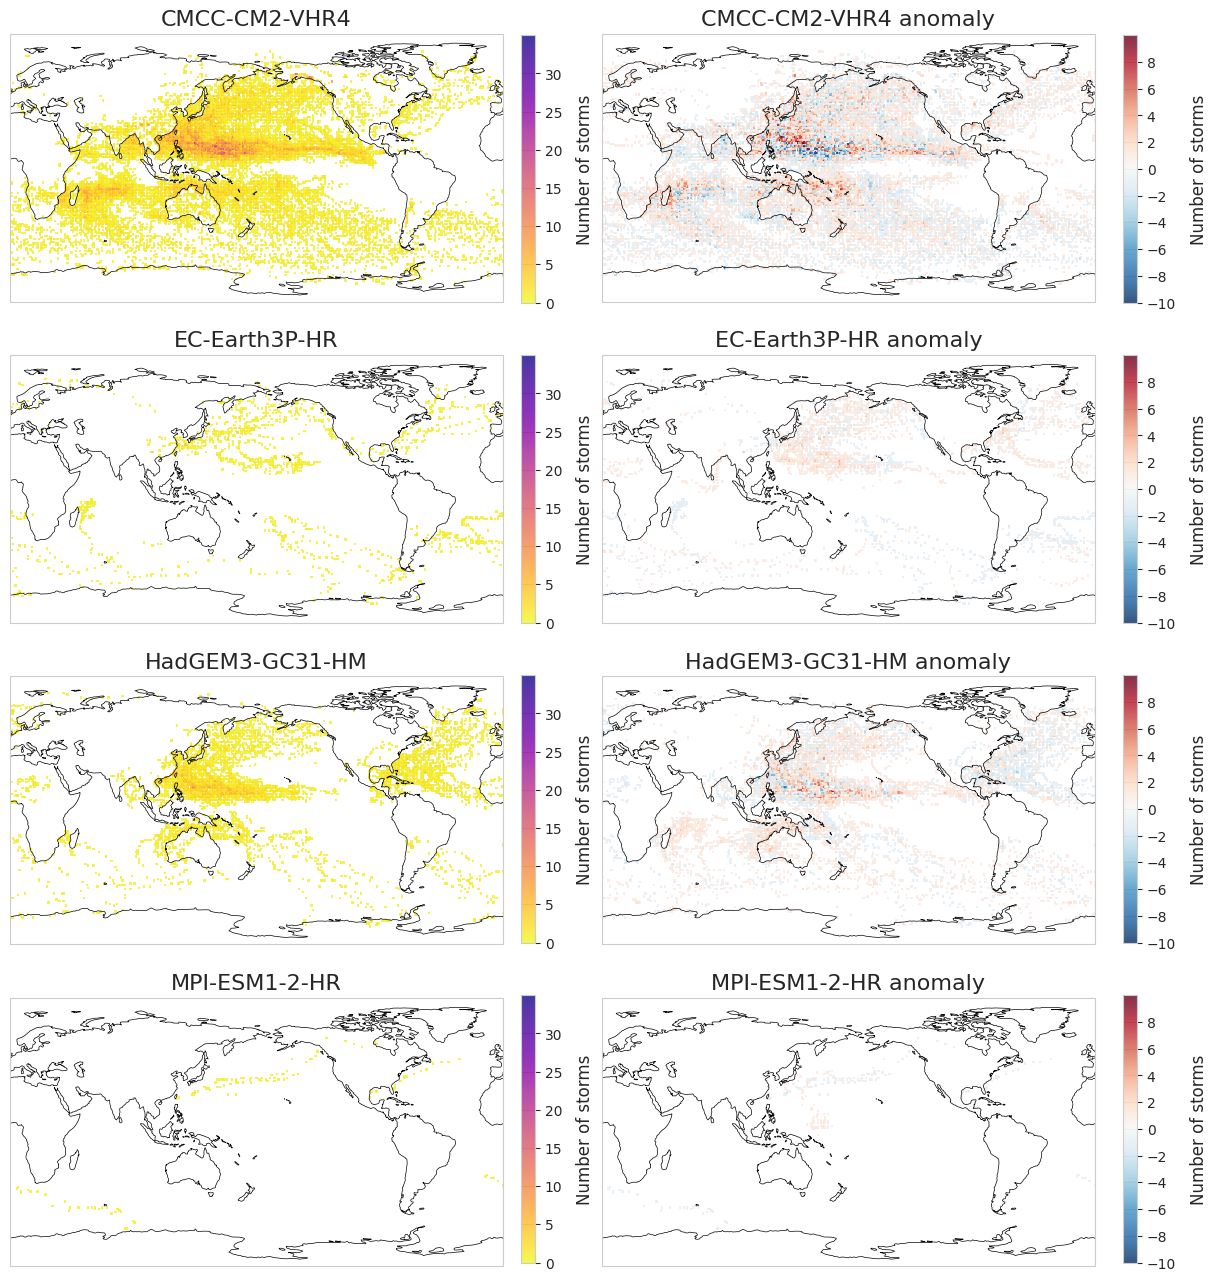

In [109]:
sns.set_style("whitegrid")  # You can change the style to your preference
fig, axes = plt.subplots(4, 2, figsize=(14, 16),gridspec_kw={'width_ratios': [1, 1]},subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})
# titles = ['Mean Sea level pressure (hPa)', 'U 850 hPa ($ms^{-1}$)', 'V 850 hPa ($ms^{-1}$)', 'Wind shear', 'Latitude (degrees North)', 'Longitude (degrees East)']
# labels = ['a.','b.','c.','d.','e.','f.']
['CMCC-CM2-VHR4','EC-Earth3P-HR','HadGEM3-GC31-HM','MPI-ESM1-2-HR']
vmax = 35 
im = axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,vmax=vmax)
axes[0,0].set_title('CMCC-CM2-VHR4',fontsize=16)


axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_ssp585_masked_density_nh - cmcc_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)
axes[0,1].set_title('CMCC-CM2-VHR4 anomaly',fontsize=16)

axes[0,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(cmcc_ssp585_masked_density_sh - cmcc_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)


im = axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,
                        vmax=vmax)
axes[1,0].set_title('EC-Earth3P-HR',fontsize=16)

im = axes[1,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,
                        vmax=vmax)

axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_ssp585_masked_density_nh - ecearth_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)
axes[1,1].set_title('EC-Earth3P-HR anomaly',fontsize=16)

axes[1,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(ecearth_ssp585_masked_density_sh - ecearth_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)


im = axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(hadgem_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,
                        vmax=vmax)
axes[2,0].set_title('HadGEM3-GC31-HM',fontsize=16)

im = axes[2,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(hadgem_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,
                        vmax=vmax)

axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(hadgem_ssp585_masked_density_nh - hadgem_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)
axes[2,1].set_title('HadGEM3-GC31-HM anomaly',fontsize=16)

axes[2,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(hadgem_ssp585_masked_density_sh - hadgem_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)


im = axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,
                        vmax=vmax)
axes[3,0].set_title('MPI-ESM1-2-HR',fontsize=16)

im = axes[3,0].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='plasma_r',vmin=0,
                        vmax=vmax)

im2 = axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_ssp585_masked_density_nh - mpi_hist_masked_density_nh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)
axes[3,1].set_title('MPI-ESM1-2-HR anomaly',fontsize=16)

axes[3,1].pcolor(np.arange(0,360),np.arange(-90,90),mask(mpi_ssp585_masked_density_sh - mpi_hist_masked_density_sh), transform=ccrs.PlateCarree(),alpha=0.8,cmap='RdBu_r',vmin=-10,
                        vmax=10)

for ax in [axes[0,0],axes[0,1],axes[1,0],axes[1,1],axes[2,0],axes[2,1],axes[3,0],axes[3,1]]:
    ax.add_feature(cfeature.COASTLINE,linewidth=0.5)   
    ax.set_aspect('auto', adjustable=None)
    ax.set_global()


# divider = make_axes_locatable(axes[0,1])
# cax1 = divider.append_axes("right", size="5%", pad=0.05)
# fig.colorbar(im, cax=cax1)
# add colourbar
cbar_ax = fig.add_axes([0.49, 0.712, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.49, 0.512, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.49, 0.312, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.49, 0.112, 0.01, 0.167])
cb = fig.colorbar(im, cax=cbar_ax,shrink=0.005,ticks=range(0,35,5)).set_label(label='Number of storms',size=12, labelpad=10)

cbar_ax = fig.add_axes([0.92, 0.712, 0.01, 0.167])
cb = fig.colorbar(im2, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.512, 0.01, 0.167])
cb = fig.colorbar(im2, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.312, 0.01, 0.167])
cb = fig.colorbar(im2, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)
cbar_ax = fig.add_axes([0.92, 0.112, 0.01, 0.167])
cb = fig.colorbar(im2, cax=cbar_ax,shrink=0.005,ticks=range(-10,10,2)).set_label(label='Number of storms',size=12, labelpad=10)

plt.savefig('highresmip_track_density.png',bbox_inches='tight',dpi=300)
